<a href="https://colab.research.google.com/github/caltunay/dd_competition_eq_damage_prediction/blob/master/Competition_EQ_Take_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# get dataframes to memory

path_train_labels = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/train_labels.csv'
path_train_values = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/train_values.csv' 
path_test_values = '/content/drive/My Drive/Colab Notebooks/Data/Competition - DrivenData - Earthquake Damage Prediction/test_values.csv'

train_labels = pd.read_csv(path_train_labels)
train_values = pd.read_csv(path_train_values)
test_values = pd.read_csv(path_test_values)

In [0]:
test_values = pd.read_csv(path_test_values)

drop = ['geo_level_2_id', 'geo_level_3_id']

test_values.drop(labels = drop, axis = 1, inplace = True)

In [0]:
# drop 2 of the subcategory for geo levels
drop = ['geo_level_2_id', 'geo_level_3_id']

train_values.drop(labels = drop, axis = 1, inplace = True)
test_values.drop(labels = drop, axis = 1, inplace = True)

In [0]:
# merge labels with values at the beginning to make it easy for myself
all = pd.merge(left = train_values, right = train_labels, on = 'building_id', how = 'inner')

In [0]:
# get series and bins (to apply to test later) of geo leve l 1
series, bins = pd.qcut(x = all['geo_level_1_id'], q = 6, retbins = True, labels = ['freq1', 'freq2', 'freq3', 'freq4', 'freq5','freq6'])
series.rename('geo_level_freq', inplace = True)

In [0]:
# concat new binned geo level to dataframe
all = pd.concat([all, series], axis = 1)
all.head()

,building_id,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,geo_level_freq
0,802906,6,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq1
1,28830,8,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,freq2
2,94947,21,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq5
3,590882,22,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,freq5
4,201944,11,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,freq3


In [0]:
# drop the geo level int column 
all.drop(labels = 'geo_level_1_id', axis = 1, inplace = True)

In [0]:
# all object columns are categorical, get them in one list to one hot encode
type_list = []

for col in all.columns.values.tolist():

    if all[col].dtype == 'object': #or all[col].dtype == 'category':
        type_list.append(col)# type_list + col
    else:
        pass

In [0]:
# this returned a category column and not populated to the type_list 
type_list.append('geo_level_freq')

In [0]:
# one hot encoding all object types
all = pd.get_dummies(data = all, prefix_sep = '|',   columns = type_list, drop_first = True)
all.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6
0,802906,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,28830,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,94947,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,590882,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,201944,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [0]:
all['damage_grade'].value_counts(normalize = True)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

In [0]:
class2, class3, class1 = all['damage_grade'].value_counts()

df_class1 = all[all['damage_grade'] == 1]
df_class2 = all[all['damage_grade'] == 2]
df_class3 = all[all['damage_grade'] == 3]

df_class2_undersampled = df_class2.sample(n = class1)
df_class3_undersampled = df_class3.sample(n = class1)

undersampled_df = pd.concat([df_class1, df_class2_undersampled, df_class3_undersampled], axis = 0, ignore_index = True)
undersampled_df.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,roof_type|x,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|s,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6
0,475515,2,0,8,6,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,989500,1,0,13,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,864809,2,0,9,8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,440102,1,5,11,3,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,402996,1,0,15,3,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


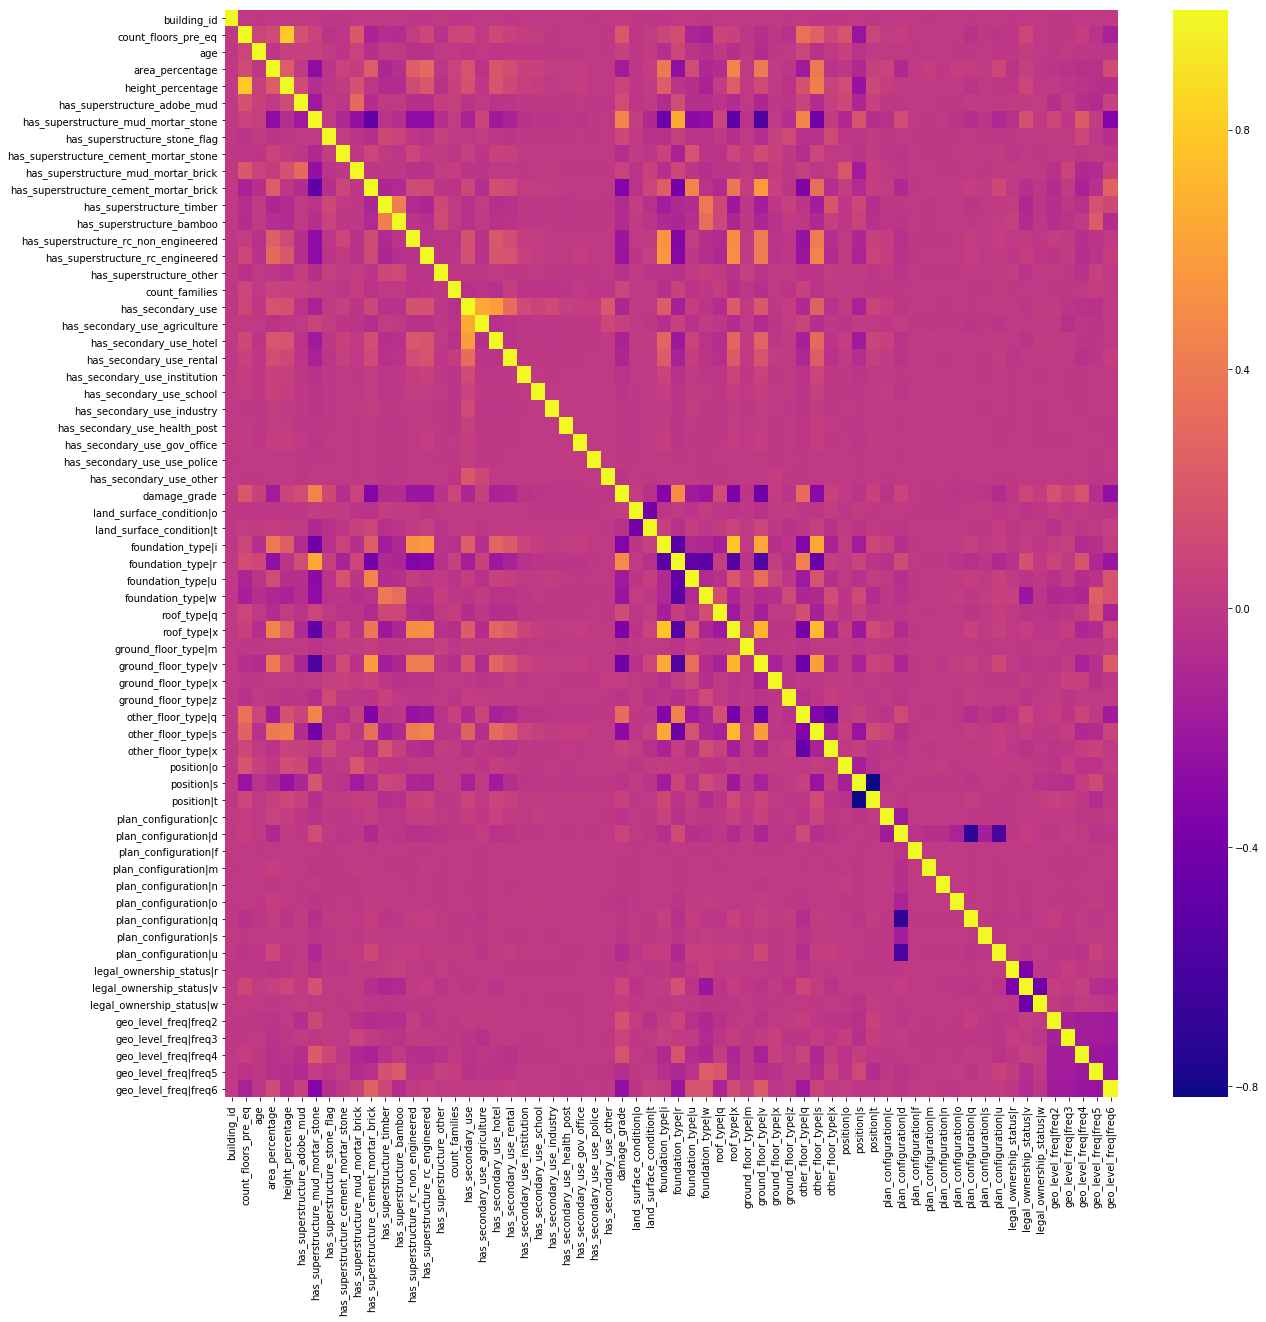

In [0]:
plt.figure(figsize = (20,20))

sns.heatmap(undersampled_df.corr(), cmap = 'plasma')

In [0]:
c = undersampled_df.corr().abs()

s = c.unstack()
s0 = pd.DataFrame(s, index = None)
# s1 = s0 < 1
# s2 = s1.sort_values(kind="quicksort", ascending = False)


In [0]:
s2 = s1[s1[0] !=1]
s2 = s2.sort_values(by = 0, ascending = False).reset_index(drop = True)

In [0]:
s2.drop('index', axis = 1, inplace = True)

In [0]:
s2 = s2.iloc[np.arange(0, len(s2), 2),:]
s2.reset_index(drop = True)

,level_0,level_1,0
0,position|s,position|t,0.817974
1,count_floors_pre_eq,height_percentage,0.800307
2,roof_type|x,foundation_type|i,0.779188
3,roof_type|x,other_floor_type|s,0.724324
4,plan_configuration|q,plan_configuration|d,0.717219
5,ground_floor_type|v,roof_type|x,0.714609
6,other_floor_type|s,foundation_type|i,0.650722
7,foundation_type|r,has_superstructure_mud_mortar_stone,0.648929
8,has_secondary_use_agriculture,has_secondary_use,0.640313
9,ground_floor_type|v,foundation_type|i,0.639922


In [0]:
# will drop features that have over .75 of correlation to some other feature
high_correlated_features_to_drop = s2[s2[0]>.75]['level_0'].values.tolist()

In [0]:
undersampled_df.drop(labels = high_correlated_features_to_drop, axis = 1, inplace = True)

In [0]:
undersampled_df.head()

,building_id,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6
0,475515,0,8,6,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,989500,0,13,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,864809,0,9,8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,440102,5,11,3,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,402996,0,15,3,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
pd.DataFrame(undersampled_df.nunique()).sort_values(by = 0, ascending = False)


In [0]:
undersampled_df2 = undersampled_df.copy()

undersampled_df2['area_percentage'] = np.log(undersampled_df2['area_percentage'] + 1)
undersampled_df2['age'] = np.log(undersampled_df2['age'] + 1)
undersampled_df2['height_percentage'] = np.log(undersampled_df2['height_percentage'] + 1) 
undersampled_df2['count_families'] = np.log(undersampled_df2['count_families'] + 1)

to_scale = 'area_percentage age height_percentage count_families'.split()

remaining_df2 = undersampled_df2.drop(labels = to_scale, axis = 1)
to_scale_df2 = undersampled_df2[to_scale]

temp_x2 = to_scale_df2.values

from sklearn.preprocessing import StandardScaler
ssx2 = StandardScaler()

scaled_x2 = ssx2.fit_transform(temp_x2)
scaled_df2 = pd.DataFrame(scaled_x2, columns = to_scale)

df_clean2 = pd.concat([remaining_df2,scaled_df2], axis = 1)
df_clean2.head()


,building_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6,area_percentage,age,height_percentage,count_families
0,475515,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.127545,-1.963615,0.460854,0.180484
1,989500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.146880,-1.963615,-0.619527,0.180484
2,864809,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.370618,-1.963615,1.267802,0.180484
3,440102,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.791245,-0.538054,-1.336020,1.865437
4,402996,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.454945,-1.963615,-1.336020,0.180484


In [0]:
df_clean2['damage_grade'].value_counts()

3    25124
2    25124
1    25124
Name: damage_grade, dtype: int64

In [0]:

y = df_clean2.damage_grade.values

In [0]:
x2 = df_clean2.drop(labels = 'building_id damage_grade'.split(), axis = 1).values
y2 = pd.get_dummies(data = df_clean2[['damage_grade']], columns = ['damage_grade'], drop_first = False, prefix_sep = '|').values

x_train2, x_test2, y_train2, y_test2 = tts(x2, y2, random_state = 42, test_size = .25)

In [0]:
# will try KNN first

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train, x_test, y_train, y_test = tts(x, y, random_state = 42, test_size = .25)

In [0]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(56529, 59) (18843, 59)
(56529,) (18843,)


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

svc = SVC(random_state= 42)
gs = GridSearchCV(svc, param_grid = tuned_parameters, n_jobs = -1, cv = 10, verbose = 1)
gs_result = gs.fit(x_train, y_train)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
x_train2.shape

(56529, 59)

In [0]:
input_dim = x2.shape[1]

model = Sequential()

model.add(Dense(31, input_dim = input_dim , activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' ,    optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(x2, y2, epochs = 150, batch_size = 7500)

Epoch 1/150
75372/75372 [==============================] - 2s 23us/step - loss: 1.0933 - acc: 0.3807
Epoch 2/150
75372/75372 [==============================] - 0s 4us/step - loss: 1.0733 - acc: 0.4518
Epoch 3/150
75372/75372 [==============================] - 0s 4us/step - loss: 1.0321 - acc: 0.5099
Epoch 4/150
75372/75372 [==============================] - 0s 4us/step - loss: 0.9667 - acc: 0.5380
Epoch 5/150
75372/75372 [==============================] - 0s 4us/step - loss: 0.9030 - acc: 0.5555
Epoch 6/150
75372/75372 [==============================] - 0s 4us/step - loss: 0.8737 - acc: 0.5656
Epoch 7/150
75372/75372 [==============================] - 0s 4us/step - loss: 0.8630 - acc: 0.5718
Epoch 8/150
75372/75372 [==============================] - 0s 4us/step - loss: 0.8561 - acc: 0.5783
Epoch 9/150
75372/75372 [==============================] - 0s 4us/step - loss: 0.8510 - acc: 0.5832
Epoch 10/150
75372/75372 [==============================] - 0s 4us/step - loss: 0.8464 - acc: 0.585

In [0]:
test_values = pd.read_csv(path_test_values)

drop = ['geo_level_2_id', 'geo_level_3_id']

test_values.drop(labels = drop, axis = 1, inplace = True)

labels = ['freq1', 'freq2', 'freq3', 'freq4', 'freq5','freq6']
bins

test_geo_level_1 = pd.cut(x = test_values['geo_level_1_id'], bins = bins, labels = labels, include_lowest = True)
test_geo_level_1.rename('geo_level_freq', inplace = True)

test_values_2 = pd.concat([test_values, test_geo_level_1], axis = 1)
# test_values_2.head()

test_values_2.drop(labels = 'geo_level_1_id', axis = 1, inplace = True)

test_vals2 = pd.get_dummies(data = test_values_2, prefix_sep = '|',   columns = type_list, drop_first = True)

test_vals2.drop(labels = high_correlated_features_to_drop, axis = 1, inplace = True)

test_vals3 = test_vals2.copy()


test_vals3['area_percentage'] = np.log(test_vals3['area_percentage'] + 1)
test_vals3['age'] = np.log(test_vals3['age'] + 1)
test_vals3['height_percentage'] = np.log(test_vals3['height_percentage'] + 1) 
test_vals3['count_families'] = np.log(test_vals3['count_families'] + 1)

to_scale3 = 'area_percentage age height_percentage count_families'.split()

remaining_df3 = test_vals3.drop(labels = to_scale3, axis = 1)
to_scale_df3 = test_vals3[to_scale3]

temp_x3 = to_scale_df3.values

scaled_x3 = ssx2.transform(temp_x3)
scaled_df3 = pd.DataFrame(scaled_x3, columns = to_scale3)
df_clean3 = pd.concat([remaining_df3,scaled_df3], axis = 1)
df_clean3.head()

,building_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6,area_percentage,age,height_percentage,count_families
0,300051,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,-0.144188,0.458670,0.460854,0.180484
1,99355,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.146880,0.628594,-0.034109,0.180484
2,890251,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.228515,-0.538054,-0.034109,0.180484
3,745817,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.969751,-1.963615,-1.336020,1.865437
4,421793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.127545,0.242314,0.889611,0.180484


In [0]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
test_clean.to_csv('test_clean.csv')
df_clean2.to_csv('train_clean_w_labels.csv')

In [0]:
test_clean = df_clean3.copy()

In [0]:
df_clean2.shape

(75372, 61)

In [0]:
testcols = test_clean.columns.values.tolist()
traincols = df_clean2.columns.values.tolist()

TypeError: ignored

In [0]:
traincols.pop(traincols.index('damage_grade'))

'damage_grade'

In [0]:
traincols.index('damage_grade')

ValueError: ignored

In [0]:
zippd = zip(traincols, testcols)

for tr, te in zippd:
    if tr != te:
        print(tr)

In [0]:
submit_arr = test_clean.drop(labels = 'building_id', axis = 1)

In [0]:
y_pred = pd.DataFrame(model.predict(submit_arr), columns = [1, 2, 3])
y_pred.head()

,1,2,3
0,0.224756,0.228938,0.546307
1,0.112953,0.558709,0.328338
2,0.320871,0.334307,0.344823
3,0.951705,0.045919,0.002377
4,0.010087,0.088423,0.901489


In [0]:
y_pred['pred_col'] = y_pred.idxmax(axis = 1)
y_pred.head(10)

,1,2,3,pred_col
0,0.224756,0.228938,0.546307,3
1,0.112953,0.558709,0.328338,2
2,0.320871,0.334307,0.344823,3
3,0.951705,0.045919,0.002377,1
4,0.010087,0.088423,0.901489,3
5,0.163967,0.239398,0.596635,3
6,0.860685,0.129097,0.010218,1
7,0.021887,0.290737,0.687377,3
8,0.156440,0.265377,0.578183,3
9,0.350822,0.458021,0.191157,2


In [0]:
final_df = y_pred[['pred_col']]

# building_id,damage_grade
# 11456,1
# 16528,1

final_df = pd.concat([test_clean[['building_id']], final_df], axis = 1)
final_df.rename({'pred_col':'damage_grade'}, axis = 1, inplace = True)

final_df.to_csv('EQ-Pred2.csv')

In [0]:
final_df.set_index('building_id', inplace = True)
final_df.to_csv('EQ-Pred3.csv')

final_df.head()

,damage_grade
building_id,
300051,3
99355,2
890251,3
745817,1
421793,3


In [0]:
df_clean2.head()

,building_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6,area_percentage,age,height_percentage,count_families
0,475515,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.127545,-1.963615,0.460854,0.180484
1,989500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.146880,-1.963615,-0.619527,0.180484
2,864809,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.370618,-1.963615,1.267802,0.180484
3,440102,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.791245,-0.538054,-1.336020,1.865437
4,402996,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.454945,-1.963615,-1.336020,0.180484


In [0]:
import xgboost as xgb

In [0]:
dtrain = xgb.DMatrix(data=x_train_xg, label=y_train_xg)
# dtest = xgb.DMatrix(data=X_test)

# dtrain = xgb.DMatrix(train[featureNames].values, label=train['target'].values)

param = {'max_depth':6, 
         'objective':'multi:softmax', 
         'eval_metric': 'mlogloss',
         'num_class':3,}

clf = xgb.train  (params = param, dtrain = dtrain, num_boost_round = 20)

XGBoostError: ignored

In [0]:
ytemp = test_clean.drop()

,building_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition|o,land_surface_condition|t,foundation_type|i,foundation_type|r,foundation_type|u,foundation_type|w,roof_type|q,ground_floor_type|m,ground_floor_type|v,ground_floor_type|x,ground_floor_type|z,other_floor_type|q,other_floor_type|s,other_floor_type|x,position|o,position|t,plan_configuration|c,plan_configuration|d,plan_configuration|f,plan_configuration|m,plan_configuration|n,plan_configuration|o,plan_configuration|q,plan_configuration|s,plan_configuration|u,legal_ownership_status|r,legal_ownership_status|v,legal_ownership_status|w,geo_level_freq|freq2,geo_level_freq|freq3,geo_level_freq|freq4,geo_level_freq|freq5,geo_level_freq|freq6,area_percentage,age,height_percentage,count_families
0,300051,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,-0.144188,0.458670,0.460854,0.180484
1,99355,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.146880,0.628594,-0.034109,0.180484
2,890251,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.228515,-0.538054,-0.034109,0.180484
3,745817,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.969751,-1.963615,-1.336020,1.865437
4,421793,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.127545,0.242314,0.889611,0.180484


In [0]:
x_xg = df_clean2.drop(labels = ['building_id', 'damage_grade'], axis = 1).values
y_xg = df_clean2['damage_grade'].values

x_train_xg, x_test_xg, y_train_xg, y_test_xg = tts(x_xg, y_xg, random_state = 42, test_size = .28)

params = {
    'max_depth': [6],
    'objective': ['multi:softmax'],  # error evaluation for multiclass training
    'num_class': [3],
    'n_estimators': [250, 400],
    'learning_rate': [0.01, 0.001]
}

clf_xgb = xgb.XGBClassifier(random_state = 42)

gs_xg = GridSearchCV(clf_xgb, param_grid = params, n_jobs = -1, cv = 7, verbose = 1)
gs_xg_result = gs.fit(x_train_xg, y_train_xg)

# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# svc = SVC(random_state= 42)
# gs = GridSearchCV(svc, param_grid = tuned_parameters, n_jobs = -1, cv = 10, verbose = 1)
# gs_result = gs.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [0]:
gs_xg_opt = gs_xg_result.best_estimator_
gs_xg_opt.predict()
# tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]} #, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# svc = SVC(random_state= 42)
# gs = GridSearchCV(svc, param_grid = tuned_parameters, n_jobs = -1, cv = 10, verbose = 1)
# gs_result = gs.fit(x_train_xg, y_train_xg)